## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drop_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = keras.layers.Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = keras.layers.Dropout(drop_ratio)(x)
        
        out = keras.layers.Dense(units=output_units,
                                 activation='softmax',
                                 name='output')(x)
        
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.2, 0.3, 0.4]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop_ratio in Dropout_EXP:
    keras.backend.clear_session() #Clear old graph
    print('Dropout ratio : {}'.format(drop_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drop_ratio=drop_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    #results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-drop-{}'.format(str(drop_ratio))
    results[exp_name_tag] = {'train-loss' : train_loss,
                             'valid-loss' : valid_loss,
                             'train-acc' : train_acc,
                             'valid-acc' : valid_acc}

Dropout ratio : 0.1
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128

50000/50000 [==============================] - 7s 145us/step - loss: 1.1673 - accuracy: 0.5792 - val_loss: 1.3326 - val_accuracy: 0.5388
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.1650 - accuracy: 0.5800 - val_loss: 1.3463 - val_accuracy: 0.5270
Epoch 48/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.1623 - accuracy: 0.5804 - val_loss: 1.3428 - val_accuracy: 0.5243
Epoch 49/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.1560 - accuracy: 0.5846 - val_loss: 1.3689 - val_accuracy: 0.5144
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.1547 - accuracy: 0.5827 - val_loss: 1.3220 - val_accuracy: 0.5366
Dropout ratio : 0.2
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
________________________________

50000/50000 [==============================] - 7s 135us/step - loss: 1.4433 - accuracy: 0.4811 - val_loss: 1.4173 - val_accuracy: 0.4965
Epoch 42/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.4313 - accuracy: 0.4861 - val_loss: 1.4329 - val_accuracy: 0.4944
Epoch 43/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.4282 - accuracy: 0.4870 - val_loss: 1.4020 - val_accuracy: 0.5064
Epoch 44/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.4255 - accuracy: 0.4865 - val_loss: 1.4283 - val_accuracy: 0.4949
Epoch 45/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.4291 - accuracy: 0.4880 - val_loss: 1.4023 - val_accuracy: 0.5024
Epoch 46/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.4197 - accuracy: 0.4912 - val_loss: 1.4041 - val_accuracy: 0.5011
Epoch 47/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.4158 - accuracy: 0.4919 - val_loss:

50000/50000 [==============================] - 7s 136us/step - loss: 1.5682 - accuracy: 0.4348 - val_loss: 1.5239 - val_accuracy: 0.4590
Epoch 37/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5704 - accuracy: 0.4351 - val_loss: 1.5397 - val_accuracy: 0.4623
Epoch 38/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5635 - accuracy: 0.4397 - val_loss: 1.5058 - val_accuracy: 0.4691
Epoch 39/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5603 - accuracy: 0.4392 - val_loss: 1.5117 - val_accuracy: 0.4637
Epoch 40/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5657 - accuracy: 0.4369 - val_loss: 1.5131 - val_accuracy: 0.4662
Epoch 41/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5577 - accuracy: 0.4386 - val_loss: 1.5327 - val_accuracy: 0.4550
Epoch 42/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5564 - accuracy: 0.4412 - val_loss:

50000/50000 [==============================] - 6s 129us/step - loss: 1.7868 - accuracy: 0.3486 - val_loss: 1.7599 - val_accuracy: 0.3888
Epoch 32/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7892 - accuracy: 0.3512 - val_loss: 1.7560 - val_accuracy: 0.3715
Epoch 33/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7814 - accuracy: 0.3507 - val_loss: 1.7767 - val_accuracy: 0.3719
Epoch 34/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7810 - accuracy: 0.3521 - val_loss: 1.7445 - val_accuracy: 0.3956
Epoch 35/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7722 - accuracy: 0.3551 - val_loss: 1.7412 - val_accuracy: 0.3946
Epoch 36/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7768 - accuracy: 0.3522 - val_loss: 1.7401 - val_accuracy: 0.3831
Epoch 37/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7706 - accuracy: 0.3554 - val_loss:

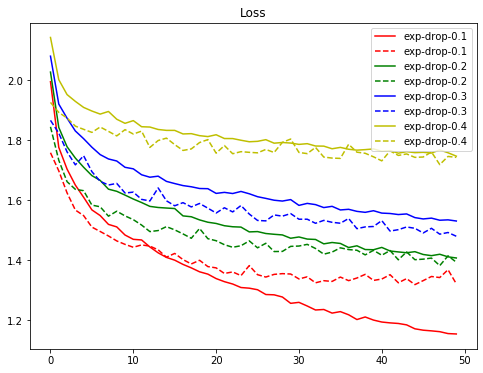

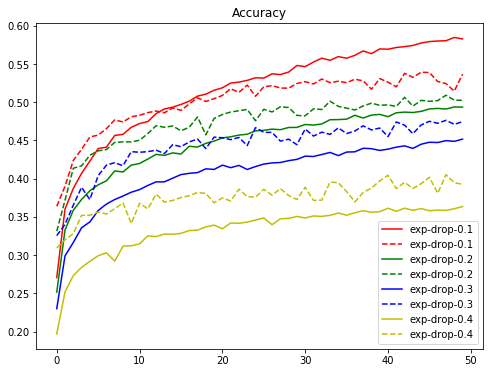

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()